In [1]:
import crispr_hmm
from Bio import SeqIO
import random
import matplotlib.pyplot as plt
import numpy as np
from Bio import pairwise2
import csv
import pandas as pd

/homes8/jingyuan/.local/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
ref = "TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGATCGCTTTTCCGAGCTTC"
HMM_result = pd.read_csv("./output/HMM_base_editor_result.csv")
NW_result = pd.read_csv("./output/NW_base_editor_result.csv")

In [3]:
import gzip

file_path = "./output/CRISPResso/CRISPResso_on_SRR3305545_filtered/base.CRISPResso_output.fastq.gz"

CRISPResso_result_fq = []

with gzip.open(file_path, "r") as file:
    while True:
        line1 = file.readline()
        line2 = file.readline()
        line3 = file.readline()
        line4 = file.readline()
        if not line2:
            break

        CRISPResso_result_fq.append(line3.decode().strip())

In [4]:
HMM_result

,aligned_ref,aligned_read,score
0,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCCTTCGCGCACCTCATGGAATC---------GCACCTGGAT...,-16.735120
1,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCCTTCGCGCACCTCATGGAATC---------GCACCTGGAT...,-16.735120
2,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCCTTCGCGCACCTCATGGAATC---------GCACCTGGAT...,-16.735120
3,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCCTTCGCGCACCTCATGGAATC---------GCACCTGGAT...,-16.735120
4,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCCTTCGCGCACCTCATGGAATC---------GCACCTGGAT...,-16.735120
...,...,...,...
14179,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCATTCGCGCACCTCATGGAATTTTTTCTGCAGCACCTGGAT...,-18.156532
14180,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCATTCGCGCACCTCATGGAATTTTTTCTGCAGCACCTGGAT...,-18.156532
14181,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCGTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,-11.564859
14182,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCGTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,-11.564859


In [5]:
CRISPResso_result = {"score": [float(i.split(" ")[2][11:]) for i in CRISPResso_result_fq],
                     "aligned_ref":[i.split(" ")[-2][8:] for i in CRISPResso_result_fq],
                     "aligned_read":[i.split(" ")[-1][8:] for i in CRISPResso_result_fq]
                    }
CRISPResso_result = pd.DataFrame(data=CRISPResso_result)
CRISPResso_result

,score,aligned_ref,aligned_read
0,85.484,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCCTTCGCGCACCTCATGGAATC---------GCACCTGGAT...
1,85.484,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCCTTCGCGCACCTCATGGAATC---------GCACCTGGAT...
2,85.484,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCCTTCGCGCACCTCATGGAATC---------GCACCTGGAT...
3,85.484,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCCTTCGCGCACCTCATGGAATC---------GCACCTGGAT...
4,85.484,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCCTTCGCGCACCTCATGGAATC---------GCACCTGGAT...
...,...,...,...
14179,93.548,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCATTCGCGCACCTCATGGAATTTTTTCTGCAGCACCTGGAT...
14180,93.548,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCATTCGCGCACCTCATGGAATTTTTTCTGCAGCACCTGGAT...
14181,98.387,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCGTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...
14182,98.387,TAGGGCCTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...,TAGGGCGTTCGCGCACCTCATGGAATCCCTTCTGCAGCACCTGGAT...


In [6]:
res = {"deletion":0,"insertion":0,"substitution":0}

for i in range(len(CRISPResso_result)):
    if "-" in CRISPResso_result["aligned_read"][i]:
        res["deletion"] += 1
    if "-" in CRISPResso_result["aligned_ref"][i]:
        res["insertion"] += 1
    if ("-" not in CRISPResso_result["aligned_read"][i]) and ("-" not in CRISPResso_result["aligned_ref"][i]):
        res["substitution"] += 1
res

{'deletion': 3080, 'insertion': 362, 'substitution': 10742}

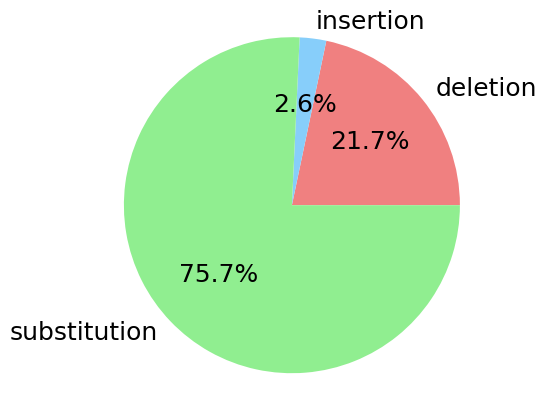

In [7]:
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Create pie chart
patches, texts, autotexts = plt.pie(list(res.values()), labels=list(res.keys()), colors=colors, autopct='%1.1f%%')

# Increase the size of the labels
for text in texts:
    text.set_size(18)
for autotext in autotexts:
    autotext.set_size(18)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

In [8]:
res = {"deletion":0,"insertion":0,"substitution":0}

for i in range(len(HMM_result)):
    if "-" in HMM_result["aligned_read"][i]:
        res["deletion"] += 1
    if "-" in HMM_result["aligned_ref"][i]:
        res["insertion"] += 1
    if ("-" not in HMM_result["aligned_read"][i]) and ("-" not in HMM_result["aligned_ref"][i]):
        res["substitution"] += 1
res

{'deletion': 3176, 'insertion': 362, 'substitution': 10742}

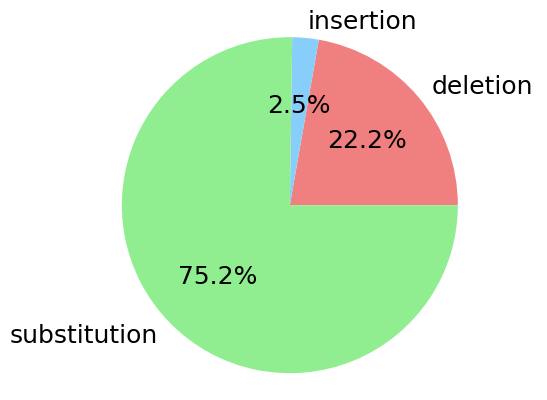

In [9]:
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Create pie chart
patches, texts, autotexts = plt.pie(list(res.values()), labels=list(res.keys()), colors=colors, autopct='%1.1f%%')

# Increase the size of the labels
for text in texts:
    text.set_size(18)
for autotext in autotexts:
    autotext.set_size(18)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

In [29]:
def find_substitution(ref, s):
    sub_pos = []
    c = 1
    for i in range(len(ref)):
        if ref[i] == "C" and s[i] == "T":
            sub_pos.append(c)
        if ref[i] != "-":
            c += 1
    return sub_pos

In [30]:
HMM_sub = []
for i in range(len(HMM_result)):
    HMM_sub += find_substitution(HMM_result["aligned_ref"][i], HMM_result["aligned_read"][i])

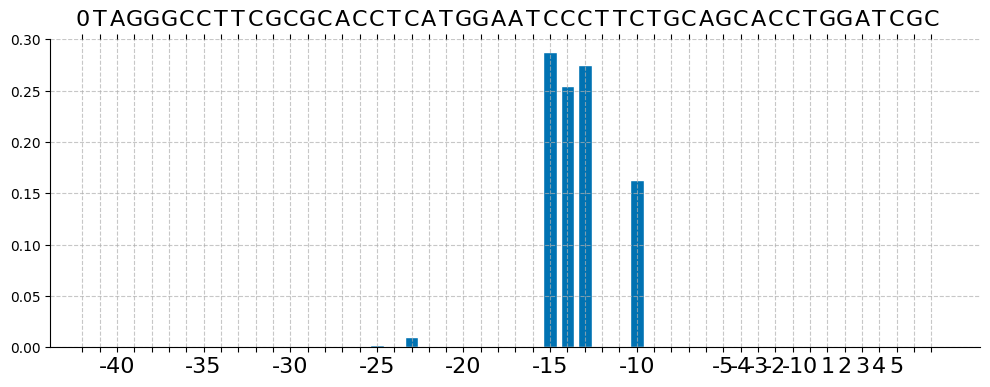

In [31]:
fig, ax = plt.subplots(figsize=(12, 4))

bar_labels = ["0"] + [j for j in ref]
bar_labels = bar_labels[:max_pos]

# Create the first histogram
weights1 = np.ones_like(HMM_sub) / len(HMM_sub)

max_pos = 50
pam_pos = 42
bin_edges = np.arange(0.5, max_pos+0.5)
pos = [j for j in range(max_pos)]
pos_tick = [str(i-pam_pos) if abs(i-pam_pos)<6 or (i-pam_pos) % 5 == 0 else "" for i in range(max_pos)]
bar_labels = ["0"] + [j for j in ref]
bar_labels = bar_labels[:max_pos]

plt.hist(HMM_sub, bins=bin_edges, edgecolor='white', alpha=1, \
         weights=weights1, rwidth=0.8, color='#0072B2')

# Customize x-axis
ax.set_xticks(pos)
ax.set_xticklabels(pos_tick, fontsize=16)

# Customize y-axis
ax.set_ylim((0, 0.3))

# Customize grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a secondary x-axis on the top
ax2 = ax.twiny()

ax2.set_xticks(pos)
ax2.set_xticklabels(bar_labels, fontsize=16)

# Remove the spines for the secondary x-axis
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Align the secondary x-axis with the primary x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())
plt.show()

In [18]:
from collections import Counter

offset=15
back_offset=-15

counter = Counter(list(HMM_result["aligned_read"]))

top_sequences = sorted(counter.items(), key=lambda x: x[1], reverse=True)[:100]
top_sequences = [i for i in top_sequences if i[0] != ref]

selected_sequences = []
selected_sequences_percentage = []
for s in top_sequences:
    if s[0].find("-") == 26:
        selected_sequences.append(s[0][offset:back_offset])
        selected_sequences_percentage.append(s[1]/len(HMM_result))
selected_sequences_stripped = [s.replace("-","") for s in selected_sequences]
selected_sequences_stripped

['CCTCATGGAATTTTTTTGCAGCACCTGGATC',
 'CCTCATGGAATTTTTTGCAGCACCTGGATC',
 'CCTCATGGAATCCTTTTGCAGCACCTGGATC',
 'CCTCATGGAATAGCACCTGGATC',
 'CCTCATGGAATTCTGCAGCACCTGGATC',
 'CCTCATGGAATCCTATTGCAGCACCTGGATC',
 'CCTCATGGAATCTTCTGCAGCACCTGGATC',
 'CCTCATGGAAAAGCACCTGGATC',
 'CCTCATGGAATCAGCACCTGGATC',
 'CCTCATGGAATTCTTTTGCAGCACCTGGATC',
 'CCTCATGGAATCTTTTGCAGCACCTGGATC',
 'CCTCATGGAATTATTTCAGCACCTGGATC',
 'CCTCATGGAATTGCAGCACCTGGATC',
 'CCTCATGGAATGTCCCTGGATC']

In [23]:
counter = Counter(list(CRISPResso_result["aligned_read"]))

top_sequences = sorted(counter.items(), key=lambda x: x[1], reverse=True)[:100]
top_sequences = [i for i in top_sequences if i[0] != ref]

print(ref[offset:back_offset] + "   " + ref[offset:back_offset] + "   Ref")
for s in top_sequences:
    ss = s[0][offset:back_offset].replace("-","")
    if ss in selected_sequences_stripped:
        print(selected_sequences[selected_sequences_stripped.index(ss)] + "   " + 
              s[0][offset:back_offset] + "   " + "{:.1%}".format(
              selected_sequences_percentage[selected_sequences_stripped.index(ss)]))

CCTCATGGAATCCCTTCTGCAGCACCTGGATC   CCTCATGGAATCCCTTCTGCAGCACCTGGATC   Ref
CCTCATGGAAT-TTTTTTGCAGCACCTGGATC   CCTCATGGAATTTTTT-TGCAGCACCTGGATC   2.8%
CCTCATGGAAT--TTTTTGCAGCACCTGGATC   CCTCATGGAATT--TTTTGCAGCACCTGGATC   1.1%
CCTCATGGAAT-CCTTTTGCAGCACCTGGATC   CCTCATGGAATCCTTT-TGCAGCACCTGGATC   0.6%
CCTCATGGAAT---------AGCACCTGGATC   CCTCATGGAAT---------AGCACCTGGATC   0.4%
CCTCATGGAAT----TCTGCAGCACCTGGATC   CCTCATGGAAT----TCTGCAGCACCTGGATC   0.3%
CCTCATGGAAT-CCTATTGCAGCACCTGGATC   CCTCATGGAATCCTAT-TGCAGCACCTGGATC   0.3%
CCTCATGGAAT--CTTCTGCAGCACCTGGATC   CCTCATGGAATC--TTCTGCAGCACCTGGATC   0.3%
CCTCATGGAAA---------AGCACCTGGATC   CCTCATGGAAA---------AGCACCTGGATC   0.3%
CCTCATGGAAT--------CAGCACCTGGATC   CCTCATGGAATC--------AGCACCTGGATC   0.3%
CCTCATGGAAT-TCTTTTGCAGCACCTGGATC   CCTCATGGAATTCTTT-TGCAGCACCTGGATC   0.3%
CCTCATGGAAT--CTTTTGCAGCACCTGGATC   CCTCATGGAATC--TTTTGCAGCACCTGGATC   0.3%
CCTCATGGAAT---TATTTCAGCACCTGGATC   CCTCATGGAATTATTTC---AGCACCTGGATC   0.3%
CCTCATGGAAT------TGCAGCACC

In [13]:
HMM_deletion_start = [i.find("-") for i in HMM_result["aligned_read"]]
HMM_deletion_start = [i for i in HMM_deletion_start if i != -1 and i < len(ref)]

NW_deletion_start = [i.find("-") for i in NW_result["aligned_read"]]
NW_deletion_start = [i for i in NW_deletion_start if i != -1 and i < len(ref)]

CRISPResso_deletion_start = [i.find("-") for i in list(CRISPResso_result["aligned_read"])]
CRISPResso_deletion_start = [i for i in CRISPResso_deletion_start if i != -1 and i < len(ref)]

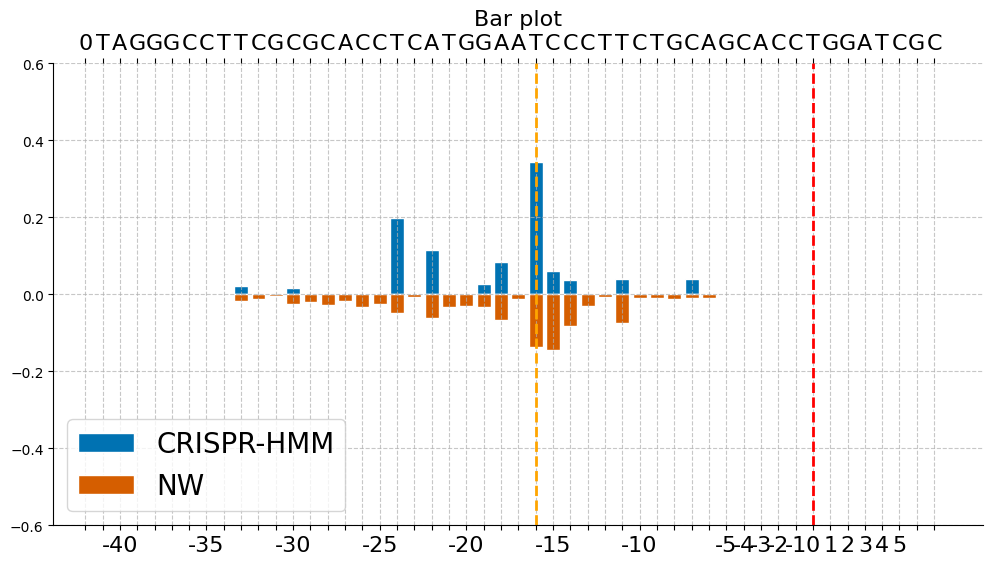

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create the first histogram
weights1 = np.ones_like(HMM_deletion_start) / len(HMM_deletion_start)
weights2 = np.ones_like(NW_deletion_start) / len(NW_deletion_start)

max_pos = 50
pam_pos = 42
bin_edges = np.arange(0.5, max_pos+0.5)
pos = [j for j in range(max_pos)]
pos_tick = [str(i-pam_pos) if abs(i-pam_pos)<6 or (i-pam_pos) % 5 == 0 else "" for i in range(max_pos)]
bar_labels = ["0"] + [j for j in ref]
bar_labels = bar_labels[:max_pos]

plt.hist(HMM_deletion_start, bins=bin_edges, edgecolor='white', alpha=1, \
         label='CRISPR-HMM', weights=weights1, rwidth=0.8, color='#0072B2')
n, bins, patches = plt.hist(NW_deletion_start, bins=bin_edges, edgecolor='white', \
         alpha=1, label='NW', weights=weights2, rwidth=0.8, color='#D55E00')
for patch in patches:
    patch.set_height(-patch.get_height())

# Customize x-axis
ax.set_xticks(pos)
ax.set_xticklabels(pos_tick, fontsize=16)

# Customize y-axis
ax.set_ylim((-0.6, 0.6))

# Add title
ax.set_title("Bar plot", fontsize=16)

# Customize grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a secondary x-axis on the top
ax2 = ax.twiny()

# Set the tick positions and labels for the secondary x-axis
ax2.set_xticks(pos)
ax2.set_xticklabels(bar_labels, fontsize=16)

# Remove the spines for the secondary x-axis
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Align the secondary x-axis with the primary x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())

# Add a legend
ax.legend(loc='lower left', fontsize=20)
ax.axvline(x=42, color='red', linestyle='--', linewidth=2)
ax.axvline(x=26, color='orange', linestyle='--', linewidth=2)

# Show the plot
plt.show()

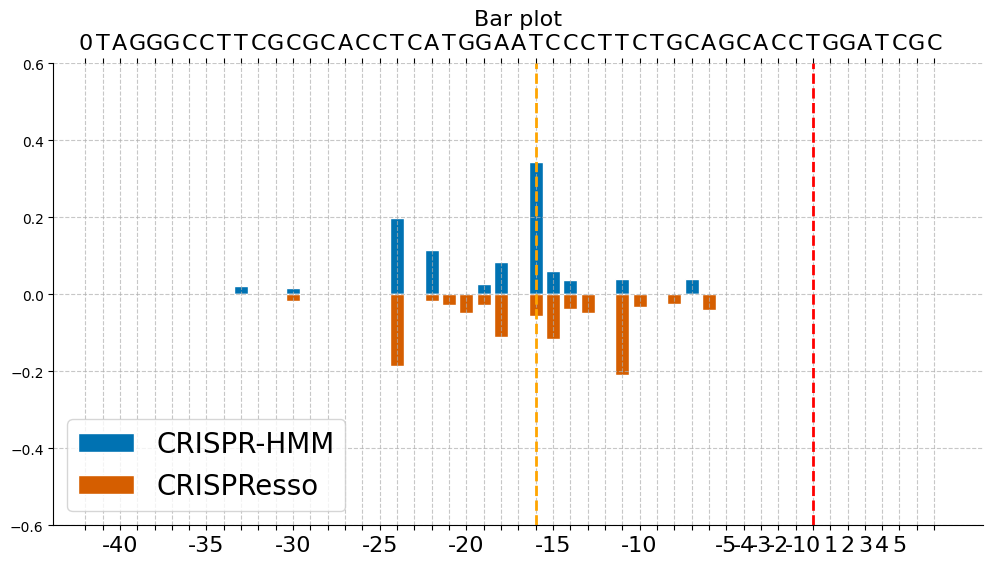

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create the first histogram
weights1 = np.ones_like(HMM_deletion_start) / len(HMM_deletion_start)
weights2 = np.ones_like(CRISPResso_deletion_start) / len(CRISPResso_deletion_start)

max_pos = 50
pam_pos = 42
bin_edges = np.arange(0.5, max_pos+0.5)
pos = [j for j in range(max_pos)]
pos_tick = [str(i-pam_pos) if abs(i-pam_pos)<6 or (i-pam_pos) % 5 == 0 else "" for i in range(max_pos)]
bar_labels = ["0"] + [j for j in ref]
bar_labels = bar_labels[:max_pos]

plt.hist(HMM_deletion_start, bins=bin_edges, edgecolor='white', alpha=1, \
         label='CRISPR-HMM', weights=weights1, rwidth=0.8, color='#0072B2')
n, bins, patches = plt.hist(CRISPResso_deletion_start, bins=bin_edges, edgecolor='white', \
         alpha=1, label='CRISPResso', weights=weights2, rwidth=0.8, color='#D55E00')
for patch in patches:
    patch.set_height(-patch.get_height())

# Customize x-axis
ax.set_xticks(pos)
ax.set_xticklabels(pos_tick, fontsize=16)

# Customize y-axis
ax.set_ylim((-.6, .6))

# Add title
ax.set_title("Bar plot", fontsize=16)

# Customize grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a secondary x-axis on the top
ax2 = ax.twiny()

# Set the tick positions and labels for the secondary x-axis
ax2.set_xticks(pos)
ax2.set_xticklabels(bar_labels, fontsize=16)

# Remove the spines for the secondary x-axis
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.axvline(x=42, color='red', linestyle='--', linewidth=2)
ax.axvline(x=26, color='orange', linestyle='--', linewidth=2)
# Align the secondary x-axis with the primary x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())

# Add a legend
ax.legend(loc='lower left', fontsize=20)

# Show the plot
plt.show()

In [15]:
HMM_insertion_start = [i.find("-") for i in HMM_result["aligned_ref"]]
HMM_insertion_start = [i for i in HMM_insertion_start if i != -1 and i < len(ref)]

NW_insertion_start = [i.find("-") for i in NW_result["aligned_ref"]]
NW_insertion_start = [i for i in NW_insertion_start if i != -1 and i < len(ref)]

CRISPResso_insertion_start = [i.find("-") for i in list(CRISPResso_result["aligned_ref"])]
CRISPResso_insertion_start = [i for i in CRISPResso_insertion_start if i != -1 and i < len(ref)]

In [20]:
len(HMM_insertion_start)

362

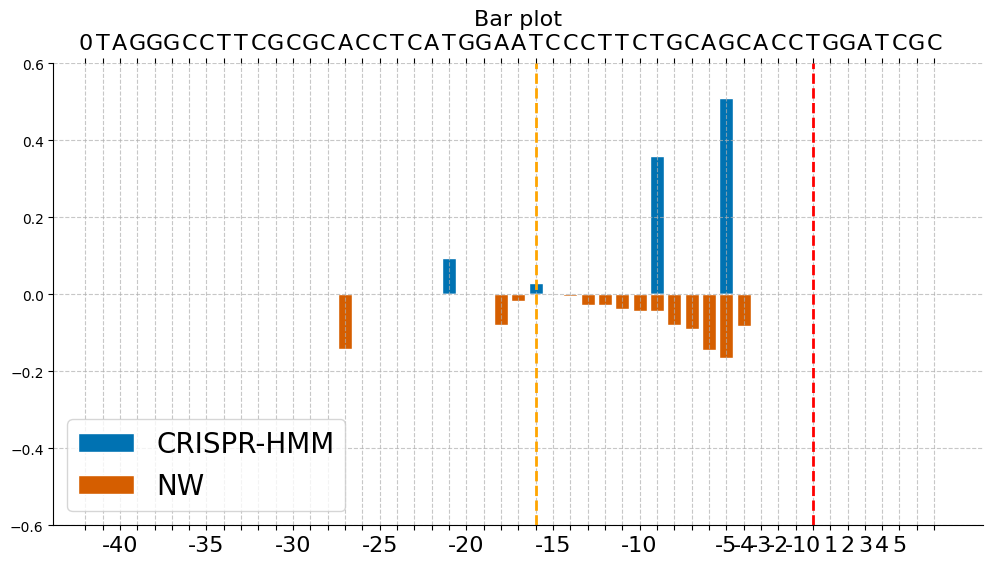

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create the first histogram
weights1 = np.ones_like(HMM_insertion_start) / len(HMM_insertion_start)
weights2 = np.ones_like(NW_insertion_start) / len(NW_insertion_start)

max_pos = 50
pam_pos = 42
bin_edges = np.arange(0.5, max_pos+0.5)
pos = [j for j in range(max_pos)]
pos_tick = [str(i-pam_pos) if abs(i-pam_pos)<6 or (i-pam_pos) % 5 == 0 else "" for i in range(max_pos)]
bar_labels = ["0"] + [j for j in ref]
bar_labels = bar_labels[:max_pos]

plt.hist(HMM_insertion_start, bins=bin_edges, edgecolor='white', alpha=1, \
         label='CRISPR-HMM', weights=weights1, rwidth=0.8, color='#0072B2')
n, bins, patches = plt.hist(NW_insertion_start, bins=bin_edges, edgecolor='white', \
         alpha=1, label='NW', weights=weights2, rwidth=0.8, color='#D55E00')
for patch in patches:
    patch.set_height(-patch.get_height())

# Customize x-axis
ax.set_xticks(pos)
ax.set_xticklabels(pos_tick, fontsize=16)

# Customize y-axis
ax.set_ylim((-0.6, 0.6))

# Add title
ax.set_title("Bar plot", fontsize=16)

# Customize grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a secondary x-axis on the top
ax2 = ax.twiny()

# Set the tick positions and labels for the secondary x-axis
ax2.set_xticks(pos)
ax2.set_xticklabels(bar_labels, fontsize=16)

# Remove the spines for the secondary x-axis
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Align the secondary x-axis with the primary x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())

# Add a legend
ax.legend(loc='lower left', fontsize=20)
ax.axvline(x=42, color='red', linestyle='--', linewidth=2)
ax.axvline(x=26, color='orange', linestyle='--', linewidth=2)

# Show the plot
plt.show()

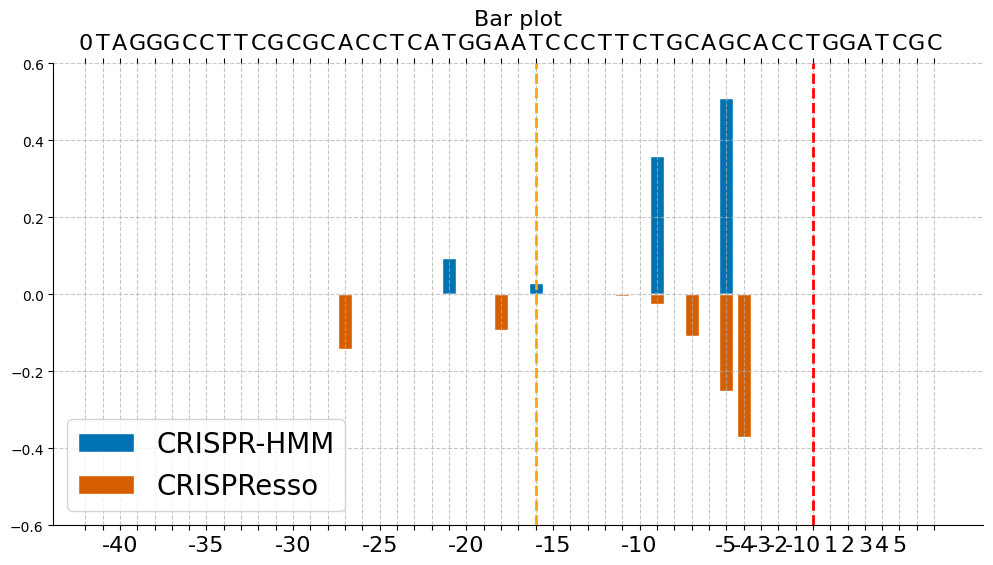

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create the first histogram
weights1 = np.ones_like(HMM_insertion_start) / len(HMM_insertion_start)
weights2 = np.ones_like(CRISPResso_insertion_start) / len(CRISPResso_insertion_start)

max_pos = 50
pam_pos = 42
bin_edges = np.arange(0.5, max_pos+0.5)
pos = [j for j in range(max_pos)]
pos_tick = [str(i-pam_pos) if abs(i-pam_pos)<6 or (i-pam_pos) % 5 == 0 else "" for i in range(max_pos)]
bar_labels = ["0"] + [j for j in ref]
bar_labels = bar_labels[:max_pos]

plt.hist(HMM_insertion_start, bins=bin_edges, edgecolor='white', alpha=1, \
         label='CRISPR-HMM', weights=weights1, rwidth=0.8, color='#0072B2')
n, bins, patches = plt.hist(CRISPResso_insertion_start, bins=bin_edges, edgecolor='white', \
         alpha=1, label='CRISPResso', weights=weights2, rwidth=0.8, color='#D55E00')
for patch in patches:
    patch.set_height(-patch.get_height())

# Customize x-axis
ax.set_xticks(pos)
ax.set_xticklabels(pos_tick, fontsize=16)

# Customize y-axis
ax.set_ylim((-.6, .6))

# Add title
ax.set_title("Bar plot", fontsize=16)

# Customize grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a secondary x-axis on the top
ax2 = ax.twiny()

# Set the tick positions and labels for the secondary x-axis
ax2.set_xticks(pos)
ax2.set_xticklabels(bar_labels, fontsize=16)

# Remove the spines for the secondary x-axis
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.axvline(x=42, color='red', linestyle='--', linewidth=2)
ax.axvline(x=26, color='orange', linestyle='--', linewidth=2)
# Align the secondary x-axis with the primary x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())

# Add a legend
ax.legend(loc='lower left', fontsize=20)

# Show the plot
plt.show()